In [7]:
# KNN method is to classify a data under categories - If KNN neighbour=3, then it will be classified as a category
# whichever has majority. e.g - if 2 neighbours are X and 1 is Y, then it'll be classified under X.

# It basically calculates the Euclidian distance and selects the nearest one.
# Euclidian Distance = SquareRoot of (X1-X2)^2 + (Y1-Y2)^2

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [5]:
print('Accuracy of KNN n-5, on the training set: {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN n-5, on the test set: {:.3f}'.format(knn.score(X_test, y_test)))

Accuracy of KNN n-5, on the training set: 0.946
Accuracy of KNN n-5, on the test set: 0.930


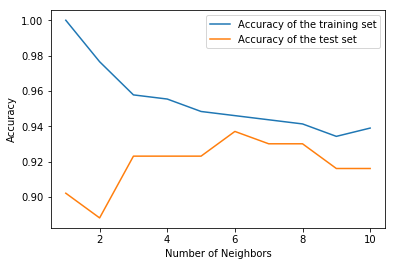

In [6]:
# Its hard to predict what KNN neighbour value should be used to make prediction, so its better to loop through
# and pick the best value out of all the models.


X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# Create two lists for training and test accuracies
training_accuracy = []
test_accuracy = []

# Define a range of 1 to 10 (included) neighbors to be tested
neighbors_settings = range(1,11)

# Loop with the KNN through the different number of neighbors to determine the most appropriate (best)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# Visualize results - to help with deciding which n_neigbors yields the best results (n_neighbors=6, in this case)
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()